# 1. Data cleaning

# Getting the data

In [2]:
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [71]:
transcripts = [url_to_transcript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-

In [73]:
for i, c in enumerate(comedians):
    with open("transcripts" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [75]:
data = {}
for i, c in enumerate(comedians):
    with open("transcripts" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [81]:
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

# Cleaning The Data

In [87]:
next(iter(data.keys()))

'louis'

In [89]:
next(iter(data.values()))

In [95]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [96]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [115]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()

In [ ]:
data_df.transcript.loc['ali']

In [117]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [119]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

In [120]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [122]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

In [125]:
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

data_df['full_name'] = full_names
data_df

In [126]:
data_df.to_pickle("corpus.pkl")

# Document-Term Matrix

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

In [138]:
data_dtm.to_pickle("dtm.pkl")
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# 2. Exploratory Data Analysis

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. Most common words - find these and create word clouds
2. Size of vocabulary - look number of unique words and also how quickly someone speaks
3. Amount of profanity - most common terms

## Most common workds

In [3]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [127]:
# Find the top 30 words said by each comedian
top_dict={}
for c in data.columns:
    e = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(e.index,e.values))
top_dict

In [130]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:15]]))
    print('---')

NOTE: At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [7]:
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

In [131]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

In [9]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'yeah',
 'said']

In [39]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1))
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [51]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


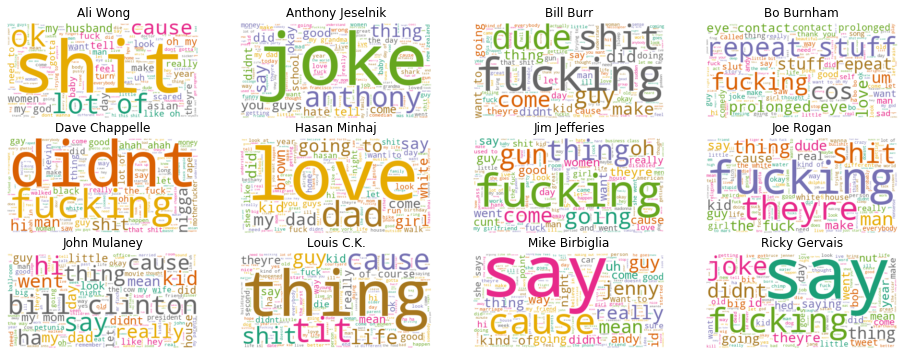

In [54]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings
Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
A lot of people use the F-word. Let's dig into that later.

## Number of Words¶

### Analysis

In [116]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,983
9,Louis C.K.,1098
3,Bo Burnham,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1399
4,Dave Chappelle,1404
7,Joe Rogan,1435
10,Mike Birbiglia,1494
5,Hasan Minhaj,1559


In [126]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,983,2905,59,49.237288
3,Bo Burnham,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1404,4094,67,61.104478
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1399,4019,62,64.822581
5,Hasan Minhaj,1559,4777,73,65.438356


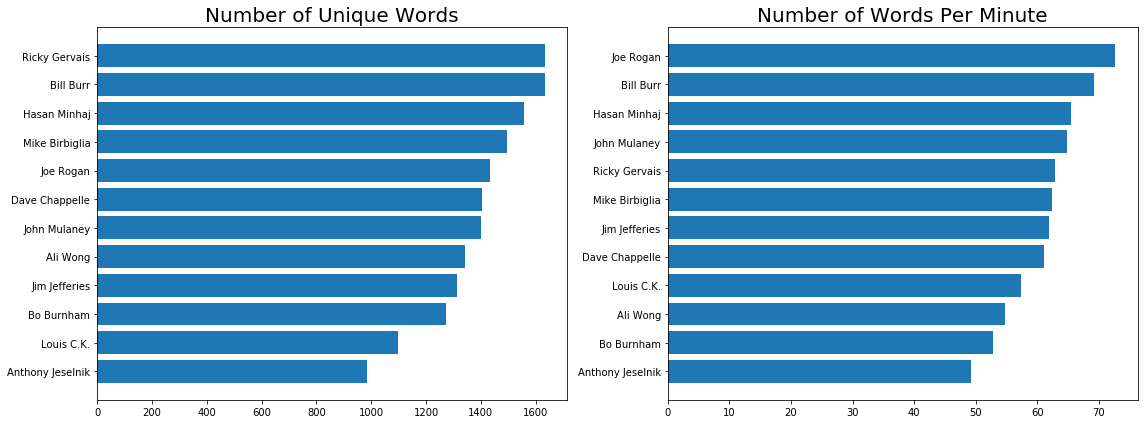

In [130]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()


## Findings
### Vocabulary
Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary
### Talking Speed
Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow

Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

# Amount of Profanity¶
### Analysis

In [132]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

In [137]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']


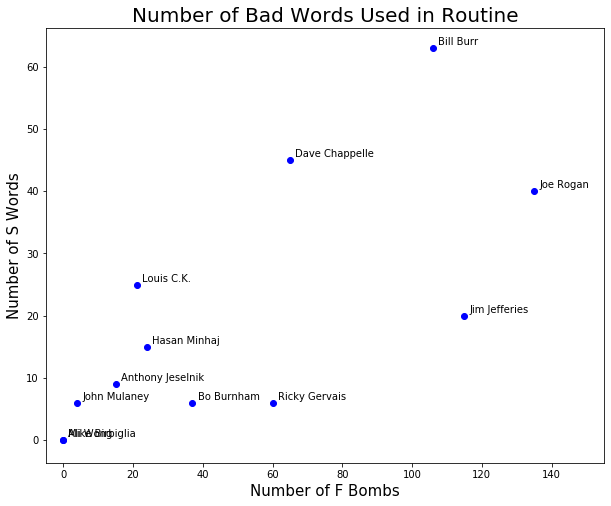

In [138]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

## Findings
### Averaging 2 F-Bombs Per Minute! - 
I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
### Clean Humor -
It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

# Sentiment Analysis

## Sentiment of Routine

In [10]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [12]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081962,0.483122
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


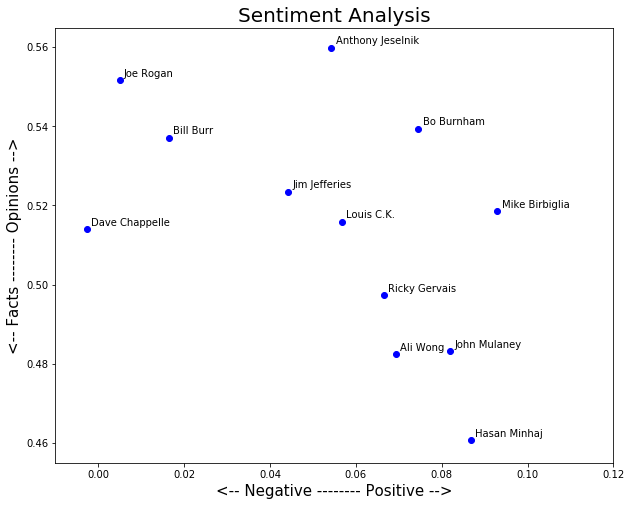

In [15]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time
Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [18]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [19]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081962,0.483122
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


In [132]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

In [23]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [24]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [56]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript[:1]


[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.13933883477633482,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.05070608684245053,
  0.058467487373737366]]

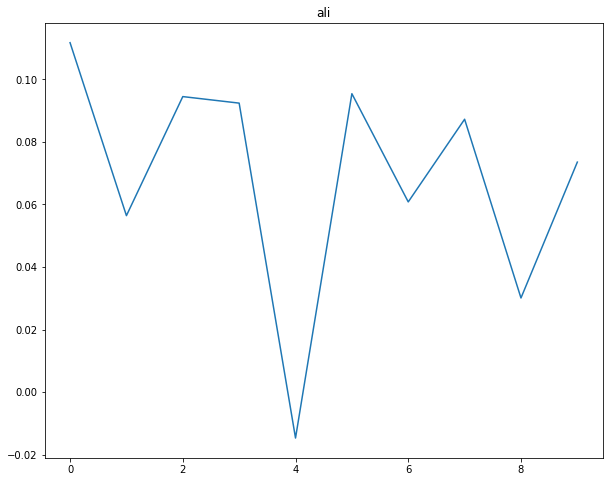

In [27]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

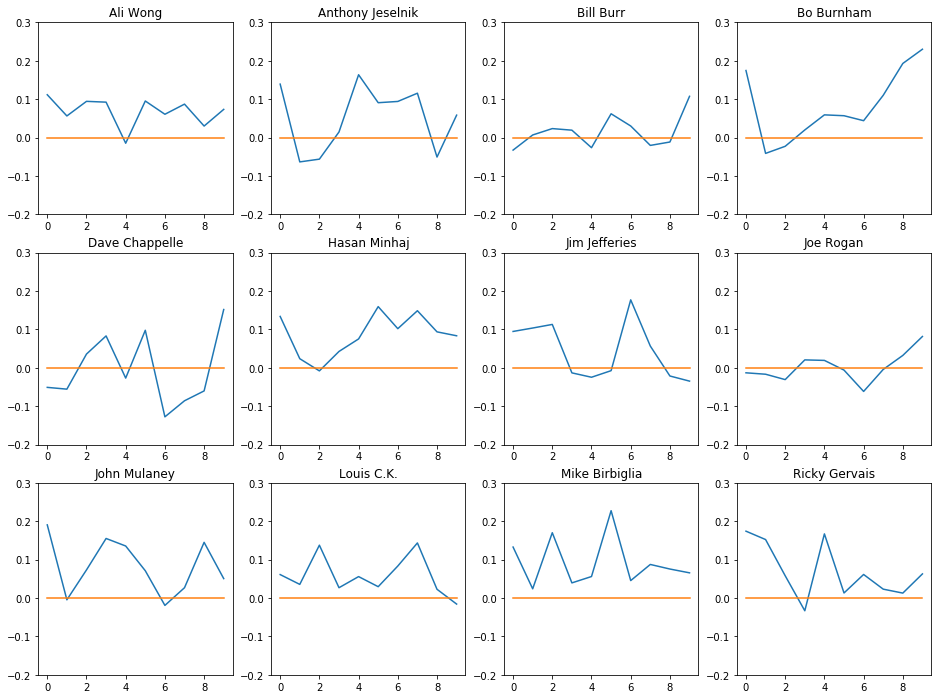

In [29]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

# Topic Modeling
## Introduction
Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do Latent Dirichlet Allocation (LDA), which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [44]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data.head()

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [33]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)
corpus

In [51]:
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())


Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [52]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.008*"fucking" + 0.006*"shit" + 0.005*"hes" + 0.005*"want" + 0.005*"say" + 0.005*"little" + 0.004*"fuck" + 0.004*"theyre" + 0.004*"didnt" + 0.004*"did"'),
 (1,
  '0.006*"fucking" + 0.006*"fuck" + 0.005*"say" + 0.005*"shit" + 0.005*"going" + 0.005*"good" + 0.005*"theyre" + 0.005*"oh" + 0.005*"cause" + 0.005*"really"')]

In [53]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.006*"cause" + 0.006*"says" + 0.005*"really" + 0.004*"oh" + 0.004*"shit" + 0.004*"goes" + 0.004*"uh" + 0.004*"jenny" + 0.004*"mean" + 0.004*"id"'),
 (1,
  '0.010*"fucking" + 0.008*"shit" + 0.007*"fuck" + 0.006*"thing" + 0.006*"didnt" + 0.005*"hes" + 0.005*"good" + 0.005*"day" + 0.005*"went" + 0.005*"going"'),
 (2,
  '0.007*"fucking" + 0.006*"say" + 0.005*"fuck" + 0.005*"going" + 0.005*"theyre" + 0.005*"oh" + 0.005*"little" + 0.005*"want" + 0.004*"love" + 0.004*"dad"')]

In [54]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.007*"clinton" + 0.005*"little" + 0.005*"hey" + 0.004*"say" + 0.004*"cause" + 0.004*"mom" + 0.004*"oh" + 0.004*"day" + 0.004*"old" + 0.004*"way"'),
 (1,
  '0.007*"say" + 0.006*"life" + 0.005*"going" + 0.005*"thing" + 0.005*"hes" + 0.005*"didnt" + 0.005*"dad" + 0.005*"day" + 0.005*"theyre" + 0.004*"good"'),
 (2,
  '0.011*"fucking" + 0.008*"fuck" + 0.006*"shit" + 0.006*"oh" + 0.006*"theyre" + 0.005*"cause" + 0.005*"going" + 0.005*"went" + 0.005*"really" + 0.005*"good"'),
 (3,
  '0.009*"shit" + 0.008*"fucking" + 0.006*"want" + 0.005*"fuck" + 0.005*"love" + 0.005*"hes" + 0.005*"dude" + 0.004*"did" + 0.004*"little" + 0.004*"make"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)
One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.).

In [77]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag
 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [78]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...
hasan,whats up davis whats up im home i had to bri...
jim,ladies and gentlemen please welcome to the ...
joe,ladies and gentlemen welcome joe rogan wha...
john,armed with boyish charm and a sharp wit the fo...
louis,introfade the music out lets roll hold there l...


In [79]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
ali,ladies gentlemen stage ali hi thank hello na s...
anthony,thank thank people i em i francisco city world...
bill,thank thank pleasure georgia area oasis i june...
bo,macdonald farm e i o farm pig e i i snort macd...
dave,jokes living stare work profound train thought...
hasan,whats davis whats home i netflix la york i son...
jim,ladies gentlemen stage mr jim jefferies thank ...
joe,ladies gentlemen joe fuck thanks phone fuckfac...
john,charm wit snl writer john mulaney marriage bee...
louis,music lets lights lights thank i i place place...


In [80]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abortion,abortions,abuse,...,yummy,ze,zealand,zee,zeppelin,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,2,0,0,...,0,0,10,0,0,0,0,0,0,0
bill,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
bo,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [82]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.009*"life" + 0.008*"day" + 0.008*"thing" + 0.008*"shit" + 0.007*"cause" + 0.007*"hes" + 0.007*"way" + 0.006*"dad" + 0.006*"guy" + 0.006*"gon"'),
 (1,
  '0.009*"man" + 0.009*"fuck" + 0.009*"thing" + 0.008*"day" + 0.007*"shit" + 0.007*"things" + 0.006*"hes" + 0.006*"way" + 0.006*"joke" + 0.005*"life"')]

In [83]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.007*"man" + 0.007*"thing" + 0.007*"way" + 0.007*"things" + 0.006*"day" + 0.006*"hes" + 0.006*"cause" + 0.006*"fuck" + 0.006*"life" + 0.006*"gon"'),
 (1,
  '0.009*"man" + 0.008*"shit" + 0.008*"fuck" + 0.008*"day" + 0.007*"dad" + 0.007*"thing" + 0.006*"life" + 0.006*"hes" + 0.006*"guy" + 0.006*"women"'),
 (2,
  '0.010*"thing" + 0.010*"day" + 0.010*"shit" + 0.009*"life" + 0.008*"hes" + 0.008*"cause" + 0.007*"way" + 0.007*"lot" + 0.007*"guy" + 0.007*"gon"')]

In [84]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.013*"shit" + 0.011*"man" + 0.009*"fuck" + 0.007*"lot" + 0.007*"didnt" + 0.006*"ahah" + 0.005*"money" + 0.005*"room" + 0.005*"guy" + 0.005*"hes"'),
 (1,
  '0.011*"day" + 0.010*"thing" + 0.009*"shit" + 0.008*"man" + 0.007*"life" + 0.007*"fuck" + 0.007*"hes" + 0.007*"way" + 0.006*"cause" + 0.006*"dad"'),
 (2,
  '0.016*"life" + 0.012*"thing" + 0.010*"hes" + 0.008*"cause" + 0.008*"course" + 0.007*"kids" + 0.007*"tit" + 0.006*"guy" + 0.006*"shit" + 0.006*"way"'),
 (3,
  '0.008*"stuff" + 0.007*"point" + 0.007*"way" + 0.007*"bo" + 0.007*"cause" + 0.006*"repeat" + 0.005*"kind" + 0.005*"night" + 0.005*"id" + 0.005*"eye"')]

# Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [85]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [86]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
ali,ladies gentlemen welcome stage ali wong hi wel...
anthony,thank san francisco thank good people surprise...
bill,right thank thank pleasure greater atlanta geo...
bo,old macdonald farm e i i o farm pig e i i snor...
dave,dirty jokes living stare most hard work profou...
hasan,whats davis whats im home i netflix special la...
jim,ladies gentlemen welcome stage mr jim jefferie...
joe,ladies gentlemen joe fuck san francisco thanks...
john,boyish charm sharp wit former snl writer john ...
louis,music lets lights lights thank much i i i nice...


In [87]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abject,able,...,ze,zealand,zee,zeppelin,zero,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,1,1,0,0
bo,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,...,0,0,2,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [89]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.005*"mom" + 0.004*"parents" + 0.003*"joke" + 0.003*"ok" + 0.003*"ass" + 0.003*"bo" + 0.003*"um" + 0.002*"dog" + 0.002*"clinton" + 0.002*"hasan"'),
 (1,
  '0.003*"joke" + 0.003*"door" + 0.003*"jenny" + 0.003*"ahah" + 0.002*"friend" + 0.002*"dead" + 0.002*"gay" + 0.002*"religion" + 0.002*"dick" + 0.002*"sense"')]

In [90]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.005*"ass" + 0.004*"gun" + 0.004*"ok" + 0.003*"dick" + 0.003*"guns" + 0.003*"dog" + 0.002*"son" + 0.002*"class" + 0.002*"jesus" + 0.002*"tit"'),
 (1,
  '0.006*"mom" + 0.006*"parents" + 0.004*"hasan" + 0.004*"clinton" + 0.004*"jenny" + 0.004*"friend" + 0.004*"york" + 0.003*"cow" + 0.003*"door" + 0.003*"john"'),
 (2,
  '0.009*"joke" + 0.004*"jokes" + 0.004*"bo" + 0.004*"repeat" + 0.004*"ahah" + 0.003*"anthony" + 0.003*"comedy" + 0.003*"gay" + 0.003*"mad" + 0.003*"eye"')]

In [91]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.008*"joke" + 0.007*"bo" + 0.006*"repeat" + 0.005*"eye" + 0.005*"contact" + 0.004*"jokes" + 0.004*"nuts" + 0.004*"cos" + 0.004*"rape" + 0.004*"brain"'),
 (1,
  '0.005*"mom" + 0.004*"parents" + 0.004*"joke" + 0.003*"son" + 0.003*"wife" + 0.003*"gun" + 0.003*"door" + 0.003*"dick" + 0.003*"ass" + 0.003*"mad"'),
 (2,
  '0.007*"jenny" + 0.005*"tit" + 0.004*"date" + 0.004*"accident" + 0.004*"parents" + 0.003*"ok" + 0.003*"worst" + 0.003*"morning" + 0.003*"ha" + 0.003*"murder"'),
 (3,
  '0.008*"husband" + 0.007*"ok" + 0.005*"pregnant" + 0.004*"asian" + 0.004*"doo" + 0.004*"fingers" + 0.004*"mom" + 0.003*"wan" + 0.003*"toilet" + 0.003*"ass"')]

# Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [92]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.008*"bo" + 0.007*"clinton" + 0.006*"repeat" + 0.005*"mom" + 0.005*"eye" + 0.005*"contact" + 0.005*"cow" + 0.004*"wife" + 0.004*"cos" + 0.004*"brain"'),
 (1,
  '0.004*"mom" + 0.004*"joke" + 0.004*"parents" + 0.003*"mad" + 0.003*"door" + 0.003*"hasan" + 0.003*"dick" + 0.003*"ahah" + 0.003*"son" + 0.003*"gun"'),
 (2,
  '0.010*"jenny" + 0.005*"accident" + 0.004*"scrambler" + 0.004*"friend" + 0.004*"argument" + 0.004*"andy" + 0.003*"morning" + 0.003*"club" + 0.003*"parents" + 0.003*"marriage"'),
 (3,
  '0.005*"joke" + 0.005*"ass" + 0.004*"guns" + 0.004*"cunt" + 0.003*"girlfriend" + 0.003*"husband" + 0.003*"ok" + 0.003*"pregnant" + 0.003*"nuts" + 0.003*"business"')]

In [ ]:
These four topics look pretty decent. Let's settle on these for now.

Topic 0: mom, parents
Topic 1: husband, wife
Topic 2: guns
Topic 3: profanity

In [94]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))


[(3, 'ali'),
 (1, 'anthony'),
 (1, 'bill'),
 (0, 'bo'),
 (1, 'dave'),
 (1, 'hasan'),
 (3, 'jim'),
 (1, 'joe'),
 (0, 'john'),
 (1, 'louis'),
 (2, 'mike'),
 (3, 'ricky')]

In [ ]:
For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.

Topic 0: mom, parents [ John,Bo]
Topic 1: husband, wife [Louis,Joe,Hasan,Dave,Bill,Anthony  ]
Topic 2: guns [ Mike ]
Topic 3: profanity [Jim,Ali ,  Ricky]

# Text Generation
## Introduction
Markov chains can be used for very basic text generation. Think about every word in a corpus as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain.

Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.

## Select Text to Imitate
In this notebook, we're specifically going to generate text in the style of Ali Wong, so as a first step, let's extract the text from her comedy routine.

In [95]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [96]:
# Extract only Ali Wong's text
ali_text = data.transcript.loc['ali']
ali_text[:200]

'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, l'

## Build a Markov Chain Function
We are going to build a simple Markov chain function that creates a dictionary:

The keys should be all of the words in the corpus
The values should be a list of the words that follow the keys

In [107]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [125]:
# Create the dictionary for Ali's routine, take a look at it
ali_dict = markov_chain(ali_text)
ali_dict

## Create a Text Generator
We're going to create a function that generates sentences. It will take two things as inputs:

The dictionary you just created
The number of words you want generated
Here are some examples of generated sentences:

'Shape right turn– I also takes so that she’s got women all know that snail-trail.'

'Optimum level of early retirement, and be sure all the following Tuesday… because it’s too.'

In [121]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [126]:
generate_sentence(ali_dict)

'Point financially. I would only 33, and that’s why are both are never finish wiping.'